<a href="https://colab.research.google.com/github/NikitaLodha25/GoldPricePrediction/blob/main/GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np      #for using numpy arrays
import pandas as pd     #for building data frames
import matplotlib.pyplot as plt     #makes plots ans graphs
import seaborn as sns             #for plots
from sklearn.model_selection import train_test_split   #splits data 
from sklearn.ensemble import RandomForestRegressor    
from sklearn import metrics     #evaluates error and scores

# **Data Collection and Processing**

In [4]:
#load csv data to Pandas dataframe
gold_data=pd.read_csv("gld_price_data.csv")

In [ ]:
#print 1st 5 rows from dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#print last 5 rows from dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#num of total rows and column
gold_data.shape

(2290, 6)

In [ ]:
#getting basic info about data
gold_data.info()  #if any missing data is present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking num of missing values
gold_data.isnull().sum()  #sum of missing values

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#getting statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Find Correlation: Positive or negative**

In [5]:
correlation=gold_data.corr()

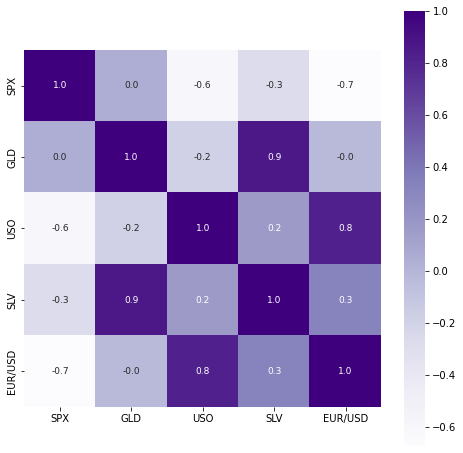

In [9]:
#construct a heatmap to understand correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',
            annot=True,
            annot_kws={'size':9},cmap='Purples')


In [10]:
#see correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


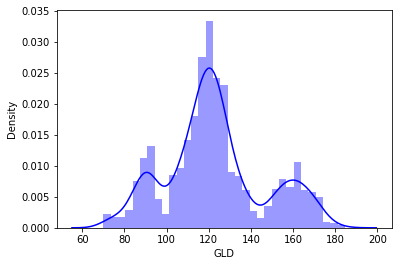

In [11]:
#check distribution of the GLD price
sns.distplot(gold_data['GLD'],color='blue') #to know the majority range of price

***Spliting Features and Targets***

In [13]:
#drop column then axis=1 or drop row then axis=0
X=gold_data.drop(['Date','GLD'],axis=1) #delete date and GLD columns
Y=gold_data['GLD']    #extract GLD column to get target
print(X)    # X has only 4 stock prices which will predict GOLD prices

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [14]:
print(Y)    #Y has the GLD prices

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## ***Spliting into Training Data and Test Data*** 

In [15]:
#80% values of X will go into X train, same for Y
#20% values of X will go into X test, same for Y
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,
                                               random_state=2)

# **Model Training : Random Forest Regression**

In [16]:
regressor=RandomForestRegressor(n_estimators=100)

In [17]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

## **Model Evaluation**

In [18]:
#prediction on Test data
test_data_prediction=regressor.predict(X_test)

In [19]:
print(test_data_prediction)

[168.73919967  81.78029989 116.3548003  127.64350054 120.78150124
 154.81799724 150.14929879 126.03480009 117.56399892 126.08480057
 116.58000157 171.31700102 141.61879828 168.05829818 115.25120025
 117.67520017 137.99820344 169.98340068 159.78760291 159.93899982
 155.20280038 125.06970043 175.97649987 156.53770329 125.17520046
  94.14189991  77.4243003  120.88120002 119.05249944 167.63779863
  87.92430042 125.30120018  90.99710035 117.79409998 121.10609874
 136.51810156 115.5049011  115.68390094 147.63329939 107.48640085
 104.48660234  87.00179792 126.53020016 117.78009994 151.92309874
 119.52870007 108.35790035 108.1032979   93.13720055 127.24449735
  74.93750018 113.53709888 121.32810011 111.21059942 118.76699888
 120.82609947 158.69039984 167.88160142 147.08999644  86.00799876
  94.54060021  86.79839917  90.63299994 118.78500128 126.4388005
 127.58449972 170.28400046 122.2596995  117.43069906  98.29640033
 168.21650076 143.12189943 131.53230251 121.2178021  120.90689952
 119.743400

In [20]:
# R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.9887838866751012


***Compare the Actual Values and Predicted values***

In [21]:
Y_test=list(Y_test)

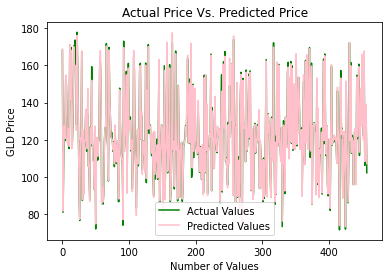

In [28]:
plt.plot(Y_test,color='green',label='Actual Values')
plt.plot(test_data_prediction,color='pink',label="Predicted Values")
plt.title("Actual Price Vs. Predicted Price")
plt.xlabel("Number of Values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()